<a href="https://colab.research.google.com/github/Raulurdaneta123/DSP-2021-2/blob/main/Semana3_DSP_Raul_Urdaneta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creación de funciones discretas**
**Universidad Militar Nueva Granada**
**Procesamiento Digital de Señales**

Este algoritmo es un lazo de retroalimentación simple con un buffer interno de M muestras

El búfer se llena con un conjunto de valores iniciales y el bucle, cuando se ejecuta, produce una señal de salida arbitrariamente larga. 

Este bucle se puede utilizar para sintetizar sonidos musicales interesantes, HAGAMOLO.





In [21]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython

In [22]:
def FuncionDiscreta(x, N):
    # dado el búfer inicial x, producir una salida de N muestras
    # concatenando copias idénticas del búfer
    y = x
    while len(y) < N:
        #seguir agregando hasta que alcancemos o excedamos la longitud requerida
        y = np.append(y, x)
    # recortamos el exceso
    y = y[0:N+1]
    return y

In [23]:
plt.rcParams["figure.figsize"] = (14,4)

Luego, dado que estamos reproduciendo audio, necesitamos configurar el "reloj" interno del sistema, también conocido como la frecuencia de muestreo:

In [24]:
FrecuenciaDeMuestreo = 16000 # 16 KHz Frecuencia de muestreo  (número de muestras por unidad de tiempo)

In [43]:
def notica(n):
    if n == "do":
        b = np.random.randn(122)
    elif n == "re":
        b = np.random.randn(108)
    elif n == "mi":
        b = np.random.randn(97)
    elif n == "fa":
        b = np.random.randn(91)
    elif n == "sol":
        b = np.random.randn(81)
    elif n == "la":
        b = np.random.randn(72)
    elif n == "si":
        b = np.random.randn(65)
    return b 
      


Con esta frecuencia de muestreo (16 KHz), dado que el período (Recordemos que es el periodo) de la señal generada es igual a la longitud del búfer inicial (x), podremos calcular la frecuencia fundamental del sonido resultante. 
Por ejemplo, si iniciamos el algoritmo con un vector de 50 valores, el búfer se ajustará a ***16000/50 = 320*** veces en un segundo se repite el búfer o, en otras palabras, la frecuencia resultante será 320Hz, que corresponde aproximadamente a un MI en un piano.

Todavía no hemos hablado sobre qué usar como valores iniciales para el búfer. Bueno, lo bueno es que podemos usar prácticamente cualquier cosa que queramos; de hecho, el uso de valores aleatorios dará un sonido totalmente fino. Como prueba, considere este conjunto de datos inicial:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


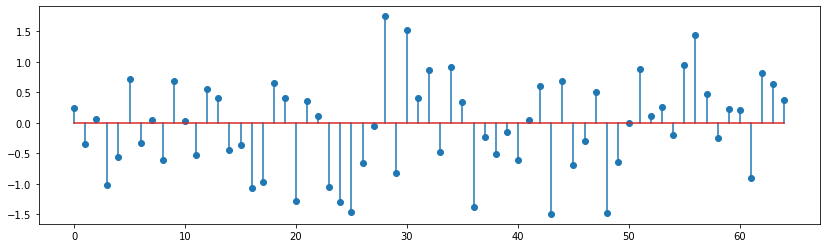

In [68]:
a = notica("si")
plt.stem(a);

Generemos ahora un audio de 2 segundos:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


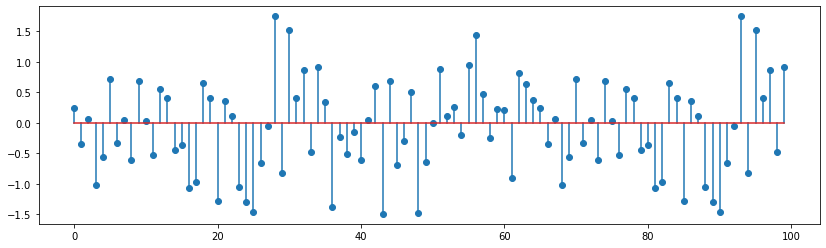

In [69]:
y = FuncionDiscreta(a, FrecuenciaDeMuestreo * 2)

# podemos ver algunos periodos:
plt.stem(y[0:100]);

In [70]:
IPython.display.Audio(y, rate=FrecuenciaDeMuestreo)

In [ ]:
# juguemos una octava más baja: simplemente dupliquemos la longitud del búfer inicial
IPython.display.Audio(FuncionDiscreta(np.random.rand(100), FrecuenciaDeMuestreo * 2), rate=FrecuenciaDeMuestreo)